In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
# load the training dataset
data = pd.read_csv('seeds.csv')

print(f"Shape of data: {data.shape}")
data.sample(10)

Shape of data: (210, 8)


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
115,19.06,16.45,0.8854,6.416,3.719,2.248,6.163,1
45,13.80,14.04,0.8794,5.376,3.155,1.560,4.961,0
82,20.20,16.89,0.8894,6.285,3.864,5.173,6.187,1
199,12.76,13.38,0.8964,5.073,3.155,2.828,4.830,2
197,13.37,13.78,0.8849,5.320,3.128,4.670,5.091,2
90,20.10,16.99,0.8746,6.581,3.785,1.955,6.449,1
11,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,0
162,12.05,13.41,0.8416,5.267,2.847,4.988,5.046,2
58,15.38,14.77,0.8857,5.662,3.419,1.999,5.222,0
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,0


In [3]:
# Display random sample of 10 obervations only features
features = data[data.columns[0:6]]
features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
151,12.01,13.52,0.8249,5.405,2.776,6.992
174,10.83,12.96,0.8099,5.278,2.641,5.182
110,18.45,16.12,0.8921,6.107,3.769,2.235
7,14.11,14.10,0.8911,5.420,3.302,2.700
76,17.32,15.91,0.8599,6.064,3.403,3.824
74,16.82,15.51,0.8786,6.017,3.486,4.004
32,14.09,14.41,0.8529,5.717,3.186,3.920
200,12.38,13.44,0.8609,5.219,2.989,5.472
165,12.10,13.15,0.8793,5.105,2.941,2.201
35,16.12,15.00,0.9000,5.709,3.485,2.270


In [4]:
# Normalize the numeric features so that they are on same scale
scaled_features = MinMaxScaler().fit_transform(data[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components= 2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

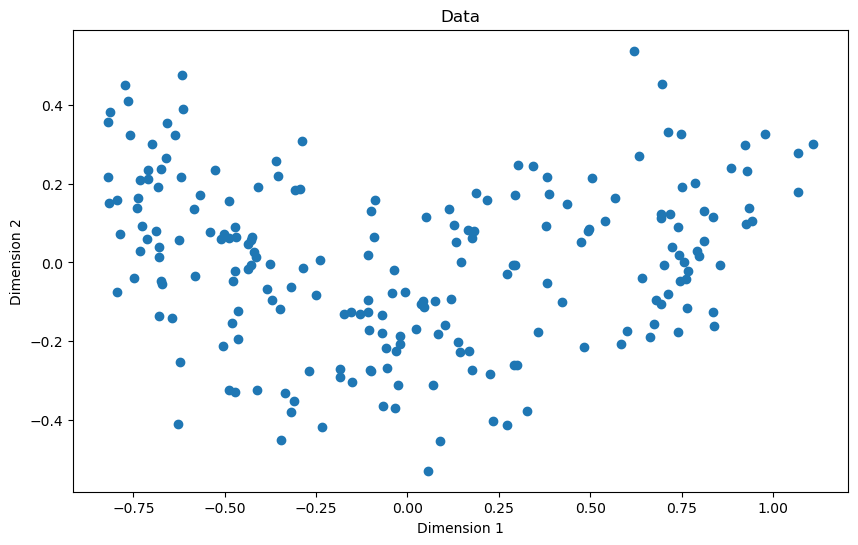

In [5]:
# We will use matplotlib for visualization

plt.figure(figsize=(10,6))
plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

D:\installes software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\installes software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\installes software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\installes software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows 

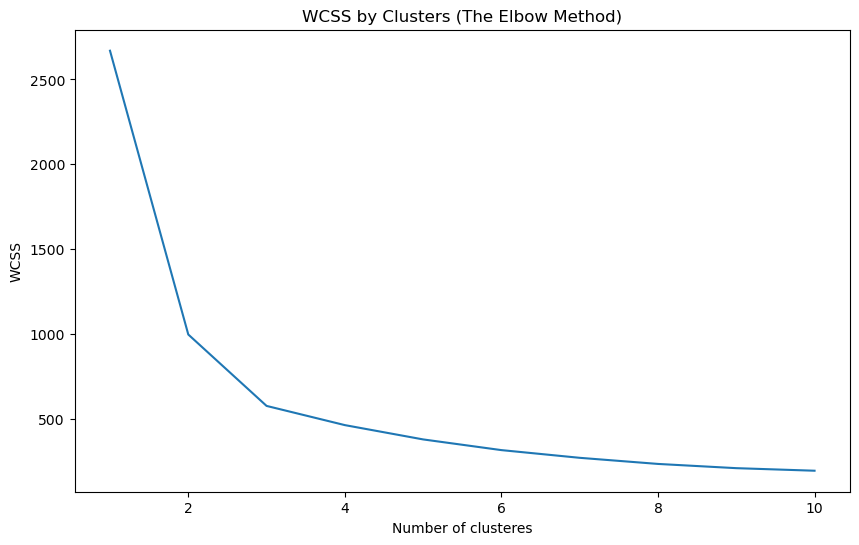

In [6]:
# Create 10 models with 1 to 10 clusteres
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
# Plot the WCSS values on lne graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('WCSS by Clusters (The Elbow Method)')
plt.xlabel('Number of clusteres')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Create a model based on 3 centroids
model = KMeans(n_clusters = 3, init= 'k-means++', n_init=100, max_iter=1000)
# Fit the data and predict the cluster assignment for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assigments
km_clusters

D:\installes software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

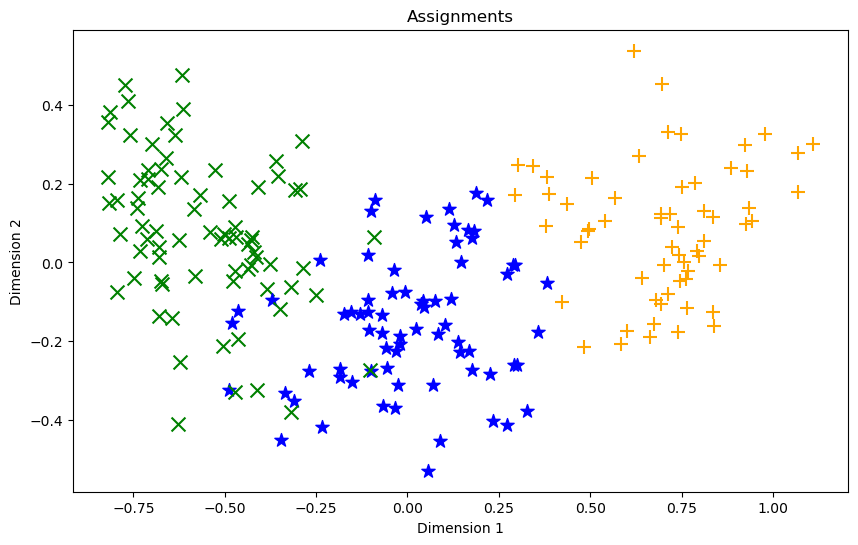

In [8]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    plt.figure(figsize=(10,6))
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

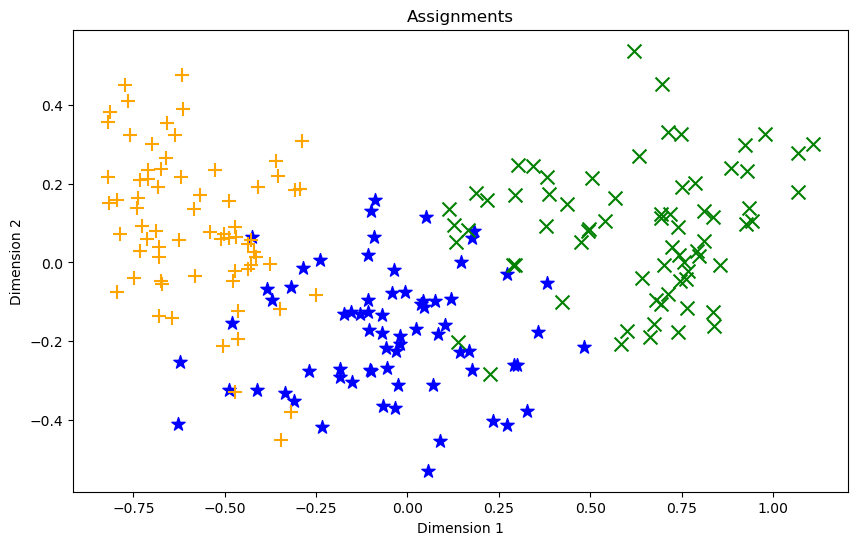

In [9]:
# Lets visulaize the clusters based on actual seed type
seed_species = data[data.columns[7]]
plot_clusters(features_2d, seed_species.values)

In [10]:
agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

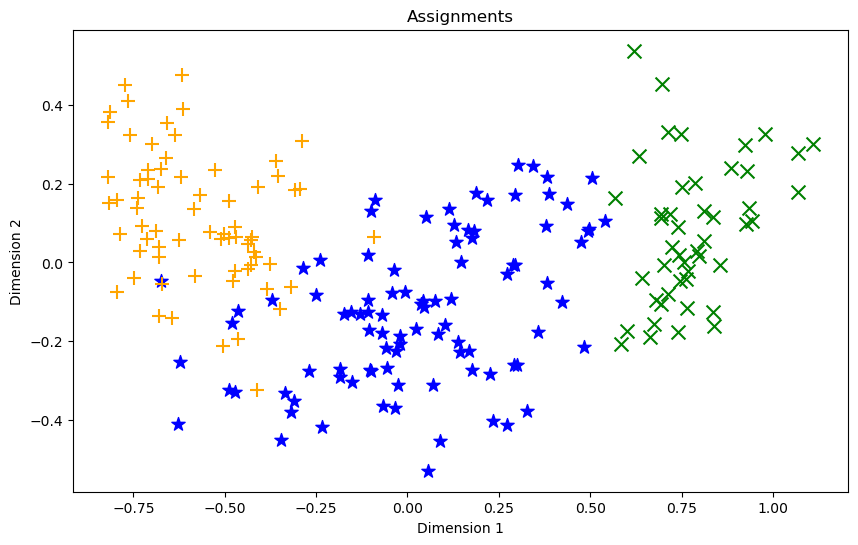

In [11]:
plot_clusters(features_2d, agg_clusters)